In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('calibration_data.csv')
df.sort_values('Panjang (cm)', inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,Panjang (cm),Bacaan Analog
0,0.0,0
1,0.0,0
2,1.0,72
3,1.0,75
4,2.0,176


In [3]:
Y = (df['Panjang (cm)'].values)[:, np.newaxis]
X = (df['Bacaan Analog'].values)[:, np.newaxis]

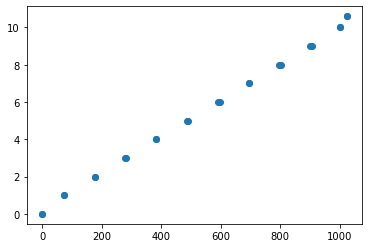

In [4]:
plt.scatter(X, Y)

In [5]:
# We use RANSAC (Random Sample Consensus) to make the linear regression more robust to the outlier
model = LinearRegression(fit_intercept=False).fit(X, Y)
pred = model.predict(X)

In [6]:
model.score(X,Y)

0.9979835513252476

In [7]:
model.intercept_

0.0

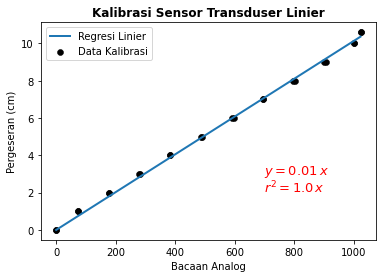

In [8]:
plt.plot(X, model.predict(X), linewidth=2.0, label='Regresi Linier')
plt.scatter(X, Y, label='Data Kalibrasi', linewidth=0.5, color='black')
plt.legend()
plt.xlabel('Bacaan Analog')
plt.ylabel('Pergeseran (cm)')
plt.title(r'Kalibrasi Sensor Transduser Linier', fontweight="bold")
pos = [700,2]
plt.text(pos[0], pos[1]+1., r'$y={:.2}\,x$'.format(model.coef_[0,0]), fontsize=13, color='red')
plt.text(pos[0], pos[1], r'$r^2={:.2}\,x$'.format(model.score(X,Y)), fontsize=13, color='red')
plt.savefig('kalibrasi_transduser_linier.png', dpi=400, transparent=True)
plt.show()